In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import matplotlib
import seaborn as sns
import statsmodels.api as sm
import statsmodels.formula.api as smf
from sklearn.model_selection import train_test_split
from statsmodels.api import qqplot, add_constant
from statsmodels.stats.outliers_influence import variance_inflation_factor

from sklearn.tree import DecisionTreeRegressor
from sklearn.ensemble import RandomForestRegressor
from sklearn.ensemble import GradientBoostingRegressor

from sklearn.metrics import mean_squared_error
from sklearn.metrics import mean_absolute_error
from sklearn.metrics import mean_absolute_percentage_error

from sklearn.linear_model import LinearRegression
from sklearn.linear_model import Ridge, Lasso, ElasticNet
from sklearn.preprocessing import StandardScaler
from sklearn.metrics import r2_score

In [2]:
import matplotlib as mpl
import matplotlib.pyplot as plt
mpl.rcParams['axes.unicode_minus'] = False

# 나눔고딕 폰트 적용
plt.rcParams["font.family"] = 'NanumGothic'

# 실행결과 경고메시지 출력 제외
import warnings

warnings.filterwarnings('ignore')

In [3]:
import os
os.getcwd()
os.chdir('/home/piai/바탕화면/유아용품')

In [4]:
df_raw = pd.read_csv('고객정보데이터_Y포함_RFM미포함1.csv')
df_raw

,고객번호,성별,결혼유무,거주지역,연령,유입경로,자녀여부,총결제금액(M),평균결제금액,총구매횟수(F),첫구매물품,구매경과일(R),활동기간,구매금액표준편차,첫구매시월령,마지막구매시월령,총할인금액,총할인율(%),이탈여부
0,201905310906249,여,미혼,강원,30.0,인스타그램,No,238606,59652,4,2단계,0,395,53439,1.0,14.0,69334,22.52,1
1,201911051026236,여,기혼,경기,34.0,네이버카페,No,95902,95902,1,5단계,0,0,0,15.0,15.0,3998,4.00,1
2,201907190943018,남,기혼,전남,35.0,지인추천,Yes,290468,72617,4,4단계,0,255,20064,10.0,13.0,109812,27.43,1
3,201912051040386,여,기혼,경기,29.0,네이버블로그,Yes,50108,25054,1,3단계,0,0,35432,8.0,8.0,35692,41.60,1
4,201902220809806,여,기혼,제주,34.0,인스타그램,Yes,48388,48388,1,5단계,0,0,0,16.0,16.0,37412,43.60,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
81061,201812310749942,여,기혼,경남,28.0,인스타그램,Yes,7642,7642,1,2단계,585,0,0,1.0,1.0,7798,50.51,0
81062,201812310750044,여,기혼,경기,34.0,지인추천,Yes,4831,4831,1,이벤트,585,0,0,7.0,7.0,1209,20.02,0
81063,201812310750017,여,기혼,경기,32.0,지인추천,Yes,4831,4831,1,이벤트,585,0,0,5.0,5.0,1209,20.02,0
81064,201901010750085,여,기혼,서울,33.0,네이버블로그,Yes,4158,4158,1,생리대,585,0,0,3.0,3.0,1092,20.80,0


In [5]:
df_raw.columns

Index(['고객번호', '성별', '결혼유무', '거주지역', '연령', '유입경로', '자녀여부', '총결제금액(M)',
       '평균결제금액', '총구매횟수(F)', '첫구매물품', '구매경과일(R)', '활동기간', '구매금액표준편차', '첫구매시월령',
       '마지막구매시월령', '총할인금액', '총할인율(%)', '이탈여부'],
      dtype='object')

In [6]:
print(df_raw.dtypes)

고객번호          int64
성별           object
결혼유무         object
거주지역         object
연령          float64
유입경로         object
자녀여부         object
총결제금액(M)      int64
평균결제금액        int64
총구매횟수(F)      int64
첫구매물품        object
구매경과일(R)      int64
활동기간          int64
구매금액표준편차      int64
첫구매시월령      float64
마지막구매시월령    float64
총할인금액         int64
총할인율(%)     float64
이탈여부          int64
dtype: object


In [7]:
df_raw.isnull().sum()

고객번호        0
성별          0
결혼유무        0
거주지역        0
연령          0
유입경로        0
자녀여부        0
총결제금액(M)    0
평균결제금액      0
총구매횟수(F)    0
첫구매물품       0
구매경과일(R)    0
활동기간        0
구매금액표준편차    0
첫구매시월령      0
마지막구매시월령    0
총할인금액       0
총할인율(%)     0
이탈여부        0
dtype: int64

In [8]:
df_raw.groupby('이탈여부')['구매경과일(R)'].mean()

이탈여부
0    361.104032
1     83.281811
Name: 구매경과일(R), dtype: float64

이탈여부가 0인 고객들은 마지막 구매 이후 평균 361일이 지났고,

이탈여부가 1인 고객들은 평균 83일밖에 지나지 않았다는 뜻

In [9]:
df_raw['이탈여부'].value_counts()

0    59328
1    21738
Name: 이탈여부, dtype: int64

이탈자 : 0 

비이탈자(유지고객) :1 

In [10]:
df_raw[df_raw['이탈여부'] == 1].sort_values('구매경과일(R)', ascending=False).head(2)

,고객번호,성별,결혼유무,거주지역,연령,유입경로,자녀여부,총결제금액(M),평균결제금액,총구매횟수(F),첫구매물품,구매경과일(R),활동기간,구매금액표준편차,첫구매시월령,마지막구매시월령,총할인금액,총할인율(%),이탈여부
21737,201912191053935,여,기혼,경남,35.0,네이버블로그,Yes,1287,1287,1,생리대,180,0,0,37.0,37.0,13,1.00,1
21639,201904120868765,여,미혼,경기,35.0,인스타그램,No,38121,19060,2,수유용품,180,245,12022,0.0,8.0,13779,26.55,1


In [11]:
df_raw[df_raw['이탈여부'] == 0].sort_values('구매경과일(R)', ascending=True).head(2)

,고객번호,성별,결혼유무,거주지역,연령,유입경로,자녀여부,총결제금액(M),평균결제금액,총구매횟수(F),첫구매물품,구매경과일(R),활동기간,구매금액표준편차,첫구매시월령,마지막구매시월령,총할인금액,총할인율(%),이탈여부
21738,201906240924528,여,기혼,충남,35.0,인스타그램,Yes,209259,104630,2,3단계,181,29,6290,5.0,6.0,104661,33.34,0
21796,201906280928705,여,기혼,강원,32.0,인스타그램,Yes,54517,13629,4,이벤트,181,223,16263,2.0,10.0,15103,21.69,0


In [12]:
# 조건 1: 재구매 고객 (2회 이상)
cond_repurchase = df_raw['총구매횟수(F)'] >= 2

# 조건 2: 최근 6개월 이내 구매 (구매경과일이 180일 이하)
cond_recent = df_raw['구매경과일(R)'] <= 180

# 조건 3: 이탈하지 않은 고객
cond_not_churned = df_raw['이탈여부'] == 1

# 모든 조건을 AND로 결합
final_cond = cond_repurchase & cond_recent & cond_not_churned

# 조건을 만족하는 고객만 추출
df_target = df_raw[final_cond].copy()

In [13]:
df_raw.shape

(81066, 19)

In [14]:
df_target.shape

(16776, 19)

In [15]:
print(f"최종 타겟 고객 수: {len(df_target)}명")
df_target.head(2)

최종 타겟 고객 수: 16776명


,고객번호,성별,결혼유무,거주지역,연령,유입경로,자녀여부,총결제금액(M),평균결제금액,총구매횟수(F),첫구매물품,구매경과일(R),활동기간,구매금액표준편차,첫구매시월령,마지막구매시월령,총할인금액,총할인율(%),이탈여부
0,201905310906249,여,미혼,강원,30.0,인스타그램,No,238606,59652,4,2단계,0,395,53439,1.0,14.0,69334,22.52,1
2,201907190943018,남,기혼,전남,35.0,지인추천,Yes,290468,72617,4,4단계,0,255,20064,10.0,13.0,109812,27.43,1


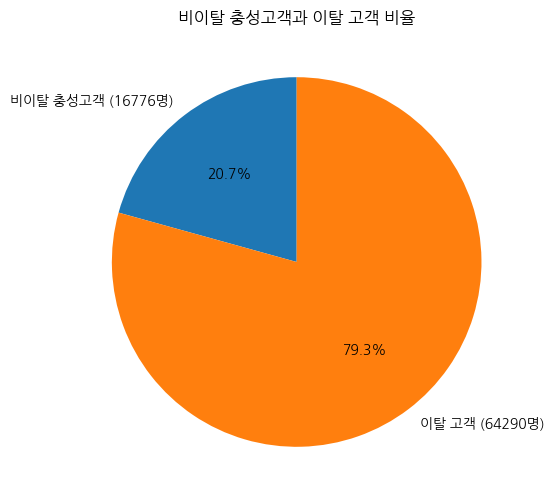

In [16]:
import matplotlib.pyplot as plt

# 전체 고객 수와 비이탈 충성고객 수
total_customers = 81066
loyal_customers = 16776

# 나머지 고객 수
other_customers = total_customers - loyal_customers

# 파이차트 그리기
labels = [f'비이탈 충성고객 ({loyal_customers}명)', f'이탈 고객 ({other_customers}명)']
sizes = [loyal_customers, other_customers]

plt.figure(figsize=(6, 6))
plt.pie(sizes, labels=labels, autopct='%1.1f%%', startangle=90)
plt.title('비이탈 충성고객과 이탈 고객 비율')
plt.ylabel('')  # ylabel 숨기기
plt.show()

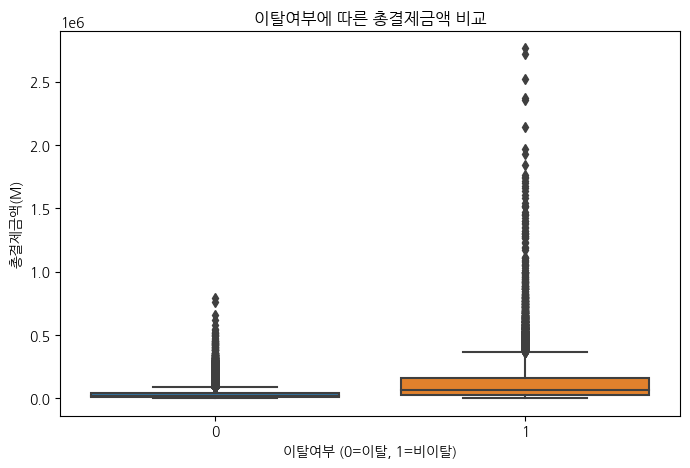

In [17]:
# 총결제금액 비교

import seaborn as sns
import matplotlib.pyplot as plt

plt.figure(figsize=(8,5))
sns.boxplot(data=df_raw, x='이탈여부', y='총결제금액(M)')
plt.title('이탈여부에 따른 총결제금액 비교')
plt.xlabel('이탈여부 (0=이탈, 1=비이탈)')
plt.ylabel('총결제금액(M)')
plt.show()

In [18]:
# 이탈여부에 따른 총결제금액(M)의 총합을 계산
total_payment_by_churn = df_raw.groupby('이탈여부')['총결제금액(M)'].sum()

# 결과 출력
total_payment_by_churn

이탈여부
0    1790416589
1    2524889414
Name: 총결제금액(M), dtype: int64

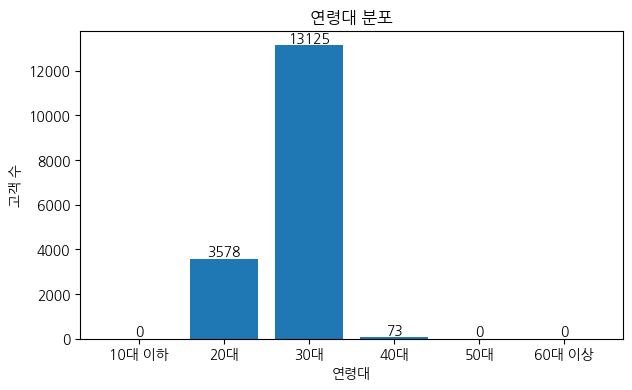

In [19]:
# 연령대 분포
bins = [0, 20, 30, 40, 50, 60, 100]
labels = ['10대 이하', '20대', '30대', '40대', '50대', '60대 이상']
df_target['연령대'] = pd.cut(df_target['연령'], bins=bins, labels=labels)

age_counts = df_target['연령대'].value_counts().sort_index()

plt.figure(figsize=(7,4))
bars = plt.bar(age_counts.index, age_counts.values)
plt.title('연령대 분포')
plt.xlabel('연령대')
plt.ylabel('고객 수')

# 바 위에 숫자 표시
for bar in bars:
    yval = bar.get_height()
    plt.text(bar.get_x() + bar.get_width()/2, yval + 1, int(yval), ha='center', va='bottom')

plt.show()

# MERGE SALES DATA

In [20]:
import pandas as pd

# sales 데이터셋을 불러옵니다 (예시: sales.csv)
sales = pd.read_csv('really_last_final.csv')  # sales 데이터셋 경로

# df_raw는 이미 데이터셋이 준비되어 있다고 가정

# 비이탈 재구매 집단만 필터링
non_churning_repeat_customers = df_raw[df_raw['이탈여부'] == 1]  # '이탈여부'가 1이면 비이탈

# 비이탈 재구매 고객 리스트에 해당하는 고객번호만 추출
non_churning_repeat_customers_ids = non_churning_repeat_customers['고객번호']

# sales 데이터셋에서 비이탈 재구매 고객들의 구매 기록만 추출
sales_filtered = sales[sales['고객번호'].isin(non_churning_repeat_customers_ids)]

# df_raw와 sales 데이터셋을 '고객번호' 기준으로 병합
merged_data = pd.merge(non_churning_repeat_customers, sales_filtered, on='고객번호', how='inner')

# 병합된 데이터 확인
print(merged_data.head())

              고객번호 성별_x 결혼유무_x 거주지역_x  연령_x 유입경로_x 자녀여부_x  총결제금액(M)  평균결제금액  \
0  201905310906249    여     미혼     강원  30.0  인스타그램     No    238606   59652   
1  201905310906249    여     미혼     강원  30.0  인스타그램     No    238606   59652   
2  201905310906249    여     미혼     강원  30.0  인스타그램     No    238606   59652   
3  201905310906249    여     미혼     강원  30.0  인스타그램     No    238606   59652   
4  201911051026236    여     기혼     경기  34.0  네이버카페     No     95902   95902   

   총구매횟수(F)  ... 결혼유무_y  거주지역_y  연령_y  결제등록카드  유입경로_y  자녀여부_y  물품대분류    물품소분류  \
0         4  ...     미혼      강원  30.0    신한은행   인스타그램      No    4단계  기저귀_팬티형   
1         4  ...     미혼      강원  30.0    신한은행   인스타그램      No    생리대      생리대   
2         4  ...     미혼      강원  30.0    신한은행   인스타그램      No    3단계  기저귀_밴드형   
3         4  ...     미혼      강원  30.0    신한은행   인스타그램      No    2단계  기저귀_밴드형   
4         1  ...     기혼      경기  34.0    국민은행   네이버카페      No    5단계  기저귀_팬티형   

    브랜드     프로모션  
0   하기스  프로모션 없음  


In [21]:
merged_data.columns

Index(['고객번호', '성별_x', '결혼유무_x', '거주지역_x', '연령_x', '유입경로_x', '자녀여부_x',
       '총결제금액(M)', '평균결제금액', '총구매횟수(F)', '첫구매물품', '구매경과일(R)', '활동기간',
       '구매금액표준편차', '첫구매시월령', '마지막구매시월령', '총할인금액', '총할인율(%)', '이탈여부', '주문번호',
       '배송완료일', '배송시작일', '구매일', '구매시월령', '구매금액', '결제금액', '상품명', '성별_y',
       '결혼유무_y', '거주지역_y', '연령_y', '결제등록카드', '유입경로_y', '자녀여부_y', '물품대분류',
       '물품소분류', '브랜드', '프로모션'],
      dtype='object')

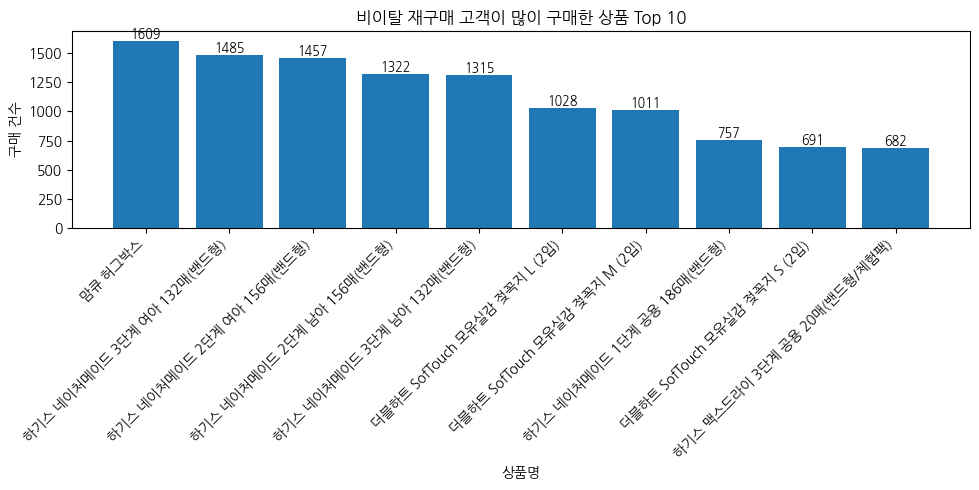

In [22]:
# 비이탈 재구매 고객의 ID 추출
target_ids = df_target['고객번호'].unique()

# sales 데이터에서 해당 고객들의 구매 이력만 필터링
df_target_sales = sales[sales['고객번호'].isin(target_ids)].copy()

# 가장 많이 팔린 상품 Top 10 추출 & 시각화
import matplotlib.pyplot as plt

top_products = df_target_sales['상품명'].value_counts().nlargest(10)

plt.figure(figsize=(10,5))
bars = plt.bar(top_products.index, top_products.values)
plt.title('비이탈 재구매 고객이 많이 구매한 상품 Top 10')
plt.xlabel('상품명')
plt.ylabel('구매 건수')
plt.xticks(rotation=45, ha='right')

# 수치 표시
for bar in bars:
    yval = bar.get_height()
    plt.text(bar.get_x() + bar.get_width()/2, yval + 1,
             int(yval), ha='center', va='bottom', fontsize=9)

plt.tight_layout()
plt.show()

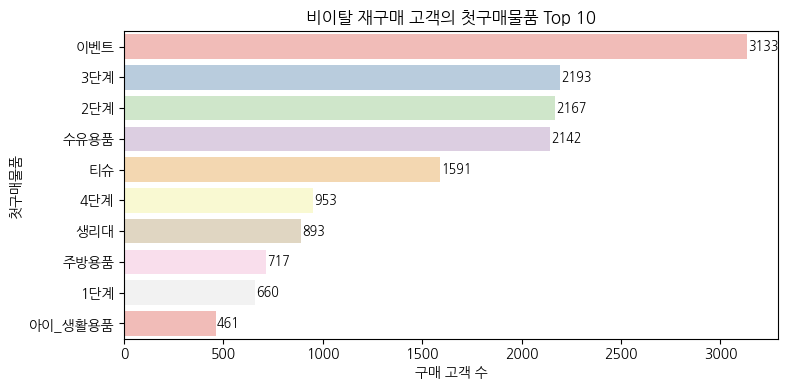

In [23]:
import matplotlib.pyplot as plt
import seaborn as sns

# 3. 첫구매물품 Top 10
top_items = df_target['첫구매물품'].value_counts().head(10)
plt.figure(figsize=(8,4))
ax = sns.barplot(x=top_items.values, y=top_items.index, palette='Pastel1')
plt.title('비이탈 재구매 고객의 첫구매물품 Top 10')
plt.xlabel('구매 고객 수')
plt.ylabel('첫구매물품')
for i, v in enumerate(top_items.values):
    ax.text(v + 5, i, str(v), color='black', va='center', fontsize=9)
plt.tight_layout()
plt.show()

In [24]:
from sklearn.cluster import KMeans
from sklearn.preprocessing import StandardScaler
import pandas as pd

# '상품명' 혹은 '상품ID'와 관련된 열을 추출하여 군집화 대상 데이터 준비
# 예시로 '상품명'과 '구매금액'을 사용한다고 가정 (각각의 변수명은 실제 데이터에 맞게 수정)
product_data = merged_data[['상품명', '구매금액']]  # 상품명과 구매금액 열 추출

# 데이터 전처리: 숫자형 데이터만 선택하고, 필요에 따라 정규화
scaler = StandardScaler()
product_data_scaled = scaler.fit_transform(product_data[['구매금액']])  # '구매금액'에 대해서만 정규화

# KMeans 군집화 수행
kmeans = KMeans(n_clusters=5, random_state=42)  # 군집 수는 예시로 5로 설정
merged_data['상품군집'] = kmeans.fit_predict(product_data_scaled)

# 군집화 결과 확인
print(merged_data[['상품명', '구매금액', '상품군집']].head())

                                  상품명    구매금액  상품군집
0    NEW 하기스 맥스드라이 팬티 4단계 여아 96매(팬티형)  177200     2
1            좋은느낌 좋은순면 울트라 날개 중형 19개입   18900     1
2      하기스 네이처메이드 밤부 3단계 여아 144매(밴드형)   59520     0
3         하기스 네이처메이드 2단계 여아 156매(밴드형)   52320     0
4  NEW 하기스 네이처메이드 팬티 5단계 여아 160매(팬티형)   99900     3


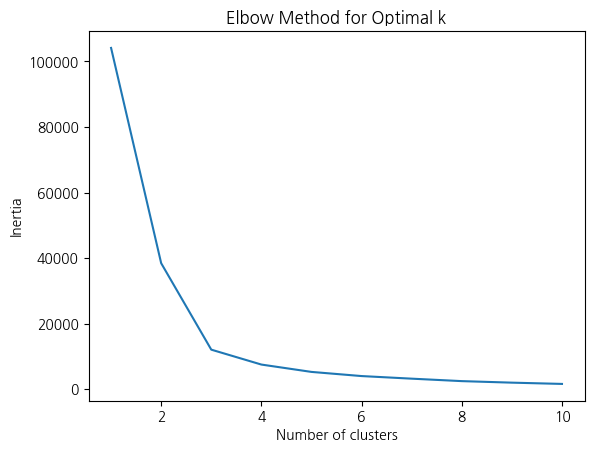

In [25]:
from sklearn.cluster import KMeans
import matplotlib.pyplot as plt

# 엘보우 방법을 통해 최적의 군집 수 찾기
inertia = []
for k in range(1, 11):  # 1부터 10까지 군집 수를 시도
    kmeans = KMeans(n_clusters=k, random_state=42)
    kmeans.fit(product_data_scaled)
    inertia.append(kmeans.inertia_)

# 엘보우 그래프 그리기
plt.plot(range(1, 11), inertia)
plt.xlabel('Number of clusters')
plt.ylabel('Inertia')
plt.title('Elbow Method for Optimal k')
plt.show()

In [26]:
# KMeans 군집화 수행 (K=3으로 설정)
kmeans = KMeans(n_clusters=3, random_state=42)  # 군집 수를 3으로 설정
merged_data['상품군집'] = kmeans.fit_predict(product_data_scaled)

# 군집화 결과 확인
print(merged_data[['상품명', '구매금액', '상품군집']].head())

                                  상품명    구매금액  상품군집
0    NEW 하기스 맥스드라이 팬티 4단계 여아 96매(팬티형)  177200     2
1            좋은느낌 좋은순면 울트라 날개 중형 19개입   18900     1
2      하기스 네이처메이드 밤부 3단계 여아 144매(밴드형)   59520     0
3         하기스 네이처메이드 2단계 여아 156매(밴드형)   52320     0
4  NEW 하기스 네이처메이드 팬티 5단계 여아 160매(팬티형)   99900     2


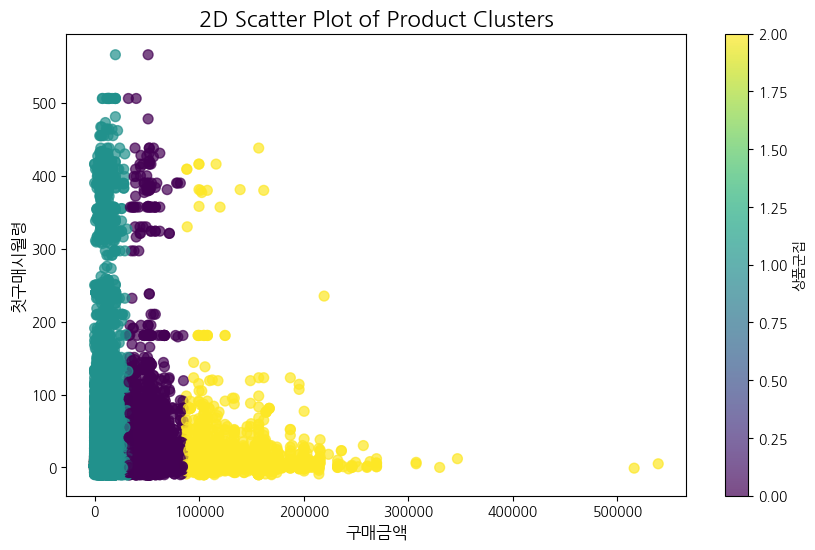

In [27]:
import matplotlib.pyplot as plt

# '구매금액'과 '첫구매시월령'을 사용하여 2D 산점도 시각화
plt.figure(figsize=(10, 6))
plt.scatter(merged_data['구매금액'], merged_data['첫구매시월령'], c=merged_data['상품군집'], cmap='viridis', s=50, alpha=0.7)

# 군집별 색상표
plt.colorbar(label='상품군집')

# 제목 및 라벨 설정
plt.title('2D Scatter Plot of Product Clusters', fontsize=16)
plt.xlabel('구매금액', fontsize=12)
plt.ylabel('첫구매시월령', fontsize=12)

plt.show()

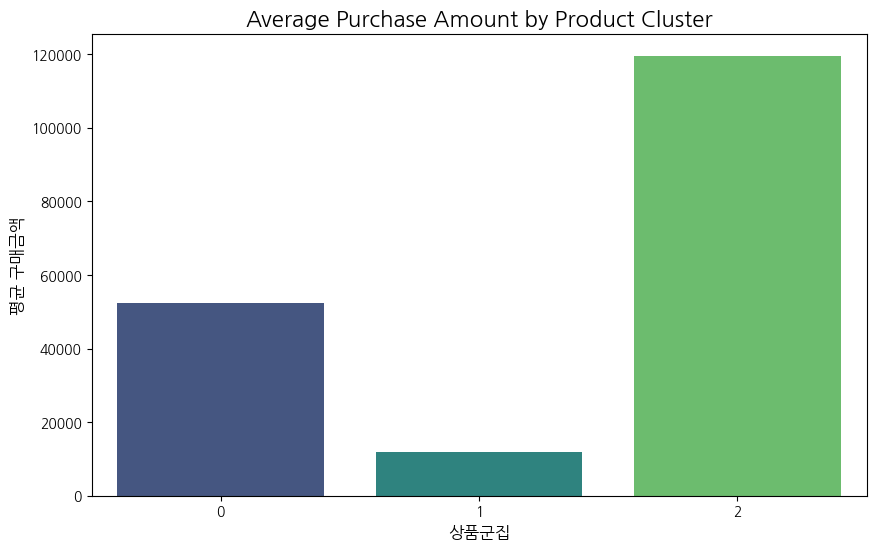

In [28]:
import seaborn as sns

# 군집별 평균 구매금액 계산
cluster_avg_price = merged_data.groupby('상품군집')['구매금액'].mean().reset_index()

# 군집별 평균 구매금액을 바 차트로 시각화
plt.figure(figsize=(10, 6))
sns.barplot(x='상품군집', y='구매금액', data=cluster_avg_price, palette='viridis')

# 제목 설정
plt.title('Average Purchase Amount by Product Cluster', fontsize=16)
plt.xlabel('상품군집', fontsize=12)
plt.ylabel('평균 구매금액', fontsize=12)

plt.show()

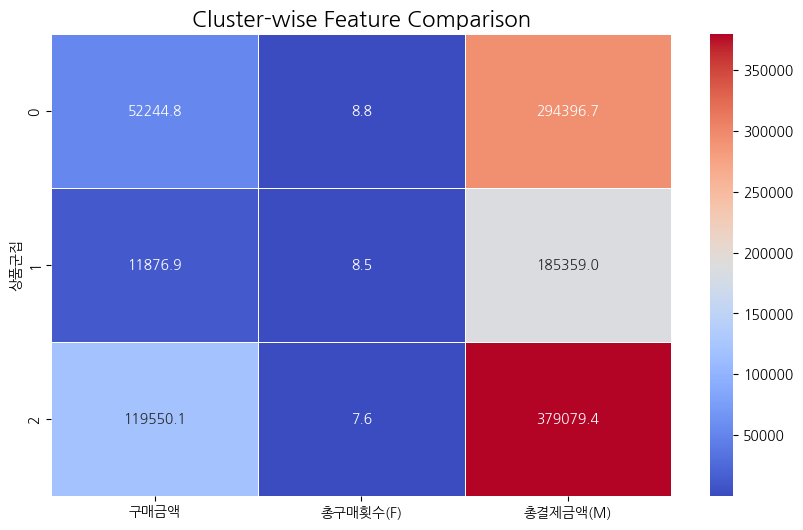

In [29]:
import seaborn as sns

# 군집별로 여러 특성의 평균값 계산
cluster_features = merged_data.groupby('상품군집')[['구매금액', '총구매횟수(F)', '총결제금액(M)']].mean()

# 히트맵 시각화
plt.figure(figsize=(10, 6))
sns.heatmap(cluster_features, annot=True, cmap='coolwarm', fmt='.1f', linewidths=0.5)

# 제목 설정
plt.title('Cluster-wise Feature Comparison', fontsize=16)
plt.show()

In [39]:
# '상품명'에 '이벤트'라는 키워드가 포함된 상품을 이벤트 상품으로 간주
merged_data['이벤트상품'] = merged_data['상품명'].apply(lambda x: 'Yes' if '이벤트' in x else 'No')

# '프로모션' 컬럼에서 '이벤트'가 포함된 경우를 이벤트 상품으로 간주
merged_data['이벤트상품'] = merged_data['이벤트상품'].combine_first(merged_data['프로모션'].apply(lambda x: 'Yes' if '이벤트' in str(x) else 'No'))

# '상품군집'을 통해 특정 카테고리나 이벤트 상품군에 해당하는 경우를 이벤트 상품으로 간주 (예시)
event_categories = ['이벤트상품군1', '이벤트상품군2']  # 예시 이벤트 상품군
merged_data['이벤트상품'] = merged_data['이벤트상품'].combine_first(merged_data['상품군집'].apply(lambda x: 'Yes' if x in event_categories else 'No'))

# 비이탈 재구매자 집단을 필터링 (이탈여부가 1인 경우)
non_churning_repeat_customers = merged_data[merged_data['이탈여부'] == 1]

# 고객별 구매한 상품과 이벤트 상품 여부 확인
purchased_products = non_churning_repeat_customers[['고객번호', '상품명', '이벤트상품']]

# 결과 출력
print(purchased_products.head())

              고객번호                                 상품명 이벤트상품
0  201905310906249    NEW 하기스 맥스드라이 팬티 4단계 여아 96매(팬티형)    No
1  201905310906249            좋은느낌 좋은순면 울트라 날개 중형 19개입    No
2  201905310906249      하기스 네이처메이드 밤부 3단계 여아 144매(밴드형)    No
3  201905310906249         하기스 네이처메이드 2단계 여아 156매(밴드형)    No
4  201911051026236  NEW 하기스 네이처메이드 팬티 5단계 여아 160매(팬티형)    No


In [40]:
import plotly.graph_objects as go

# 예시로 사용할 상위 5개 상품
labels_short = ['하기스 네이처메이드 3단계 남아', '하기스 네이처메이드 2단계 남아', '하기스 네이처메이드 3단계 여아', '하기스 네이처메이드 2단계 여아', '맘부 하퍼스']

# 예시로 사용할 상품 간의 관계
sources = [0, 1, 0]  # 상품 0 -> 상품 1, 상품 0 -> 상품 2, 상품 1 -> 상품 2
targets = [1, 2, 3]  # 상품 1, 상품 2, 상품 3
values = [10, 15, 7]  # 각 상품 간의 동시 구매 횟수

# Sankey Diagram 생성
sankey = go.Figure(go.Sankey(
    node=dict(
        pad=15,
        thickness=20,
        line=dict(color='black', width=0.5),
        label=labels_short  # 간략한 상품명 사용
    ),
    link=dict(
        source=sources,  # 연결의 출발점
        target=targets,  # 연결의 도착점
        value=values  # 연결 강도
    )
))

# 제목 추가
sankey.update_layout(title_text='Sankey Diagram of Simultaneous Purchases of Top 5 Products', font_size=10)

# 시각화
sankey.show()

In [77]:
# '이벤트상품' 컬럼이 'Yes'인 상품만 필터링
event_products = merged_data[merged_data['이벤트상품'] == 'Yes']

# 비이탈 재구매자 집단에서 이벤트 상품만 추출
non_churning_event_products = event_products[event_products['이탈여부'] == 1]

# 결과 출력
print(non_churning_event_products[['고객번호', '상품명', '이벤트상품']].head())

                  고객번호                               상품명 이벤트상품
365    201905230899894  (핫딜위크/500원딜) 스카트 이벤트 상품 30매 (EA)   Yes
5662   201903070827825  (핫딜위크/500원딜) 스카트 이벤트 상품 30매 (EA)   Yes
9631   201902010786440  (핫딜위크/500원딜) 스카트 이벤트 상품 30매 (EA)   Yes
15499  201905240900877  (핫딜위크/500원딜) 스카트 이벤트 상품 30매 (EA)   Yes
18597  201903190843965  (핫딜위크/500원딜) 스카트 이벤트 상품 30매 (EA)   Yes


In [57]:
# 상위 5개 상품에 '맘큐허그박스'가 포함되는지 확인
top_5_products = non_churning_repeat_customers['상품명'].value_counts().head(5).index
print(top_5_products)

Index(['맘큐 허그박스', '하기스 네이처메이드 3단계 여아 132매(밴드형)', '하기스 네이처메이드 2단계 여아 156매(밴드형)',
       '하기스 네이처메이드 2단계 남아 156매(밴드형)', '하기스 네이처메이드 3단계 남아 132매(밴드형)'],
      dtype='object')


In [50]:
# 비이탈 재구매자 집단을 필터링 (이탈여부가 1인 경우)
non_churning_repeat_customers = merged_data[merged_data['이탈여부'] == 1]

# 비이탈 재구매자 집단 고객이 구매한 상품 목록
purchased_products = non_churning_repeat_customers[['고객번호', '상품명']]

# 중복을 제거하고, 고객별로 구매한 상품을 나열
purchased_products_list = purchased_products.groupby('고객번호')['상품명'].apply(list).reset_index()

# 결과 출력
print(purchased_products_list.head())

              고객번호                                                상품명
0  201812310749735  [NEW 하기스 맥스드라이 팬티 5단계 남아 80매(팬티형), 더블하트 SofTou...
1  201812310749783  [NEW 하기스 네이처메이드 팬티 5단계 남아 80매(팬티형), 하기스 네이처메이드...
2  201812310749784  [2020 하기스 매직팬티 컴포트 썸머 4단계 공용 192매(팬티형), NEW 하기...
3  201812310749787  [스카트 기름때전용 티슈 30매 (EA), 크리넥스 버블버블 핸드워시 상큼향 거품펌...
4  201812310749827  [2020 하기스 매직팬티 컴포트 3단계 여아 20매(팬티형/체험팩) (EA), N...


In [51]:
# 비이탈 재구매자 집단을 필터링 (이탈여부가 1인 경우)
non_churning_repeat_customers = merged_data[merged_data['이탈여부'] == 1]

# 비이탈 재구매자 집단 고객이 구매한 상품 목록
purchased_products = non_churning_repeat_customers[['고객번호', '상품명']]

# 중복을 제거하고, 고객별로 구매한 상품을 나열
purchased_products_list = purchased_products.groupby('고객번호')['상품명'].apply(list).reset_index()

# 상위 10명의 고객만 선택
top_10_customers = purchased_products_list.head(5)

# 결과 출력
pd.set_option('display.max_rows', None)  # 전체 행을 출력하도록 설정
pd.set_option('display.max_colwidth', None)  # 열 너비를 제한하지 않도록 설정

print(top_10_customers)

              고객번호  \
0  201812310749735   
1  201812310749783   
2  201812310749784   
3  201812310749787   
4  201812310749827   

                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                    상품명  
0                                                                                                                                                                                                                                                                                                                                                        

In [52]:
from mlxtend.frequent_patterns import apriori, association_rules
import pandas as pd

# '상품명'을 이진화된 형태로 변환
# 각 고객이 구매한 상품을 이진화하여 테이블로 변환
basket_data = purchased_products_list.copy()

# 상품명을 이진화: 고객이 상품을 구매하면 1, 구매하지 않으면 0
# 상품명이 하나의 칼럼으로 들어가도록 데이터를 변형
basket_data = basket_data.set_index('고객번호')['상품명'].apply(pd.Series).stack().reset_index(drop=True, level=1)
basket_data = basket_data.groupby([basket_data.index, basket_data]).size().unstack(fill_value=0)

# 이진화된 값을 True/False로 변환 (0은 False, 1은 True)
basket_data = basket_data.astype(bool)

# Apriori 알고리즘 실행: 최소 지지도 0.01로 설정 (지지도 낮추기)
frequent_itemsets = apriori(basket_data, min_support=0.01, use_colnames=True)

# 연관 규칙 생성 (Lift 기준)
rules = association_rules(frequent_itemsets, metric="lift", min_threshold=1.0)

# 추천 규칙 보기
print(rules[['antecedents', 'consequents', 'support', 'confidence', 'lift']].head())

                     antecedents                    consequents   support  \
0  (하기스 네이처메이드 3단계 남아 132매(밴드형))  (하기스 네이처메이드 2단계 남아 156매(밴드형))  0.011685   
1  (하기스 네이처메이드 2단계 남아 156매(밴드형))  (하기스 네이처메이드 3단계 남아 132매(밴드형))  0.011685   
2  (하기스 네이처메이드 2단계 여아 156매(밴드형))  (하기스 네이처메이드 3단계 여아 132매(밴드형))  0.014399   
3  (하기스 네이처메이드 3단계 여아 132매(밴드형))  (하기스 네이처메이드 2단계 여아 156매(밴드형))  0.014399   

   confidence      lift  
0    0.250988  5.084791  
1    0.236719  5.084791  
2    0.267521  5.248537  
3    0.282491  5.248537  


lift 값이 1보다 크면 두 상품 간에 연관성이 있다는 뜻